In [204]:
#Sean McCulloch 26feb2022

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [205]:
#1. Find the number of events that occur, per country per year, in the posted ACLED data. Note that
#for this exercise, we want an event that includes two groups to only be counted once.

acled = pd.read_csv('../../data/acled_to_2019-12-31_Africa.csv')

In [206]:
acled.columns

Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'interaction', 'region', 'country', 'admin1',
       'admin2', 'admin3', 'location', 'latitude', 'longitude',
       'geo_precision', 'source', 'source_scale', 'notes', 'fatalities',
       'timestamp', 'iso3'],
      dtype='object')

In [207]:
#Remove duplicates for same event different actors
acled_one_event = acled.drop_duplicates(subset=['data_id'])

In [208]:
#groupby country, year and get counts. then print series
ctry_yr_cts = acled_one_event.groupby(['country', 'year'], as_index=False).count()
ctry_yr_cts = ctry_yr_cts[['country', 'year', 'data_id']]
ctry_yr_cts = ctry_yr_cts.rename(columns={'data_id':'countevents'})

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(ctry_yr_cts)

                           country  year  countevents
0                          Algeria  1997          141
1                          Algeria  1998           48
2                          Algeria  1999           66
3                          Algeria  2000          170
4                          Algeria  2001          250
5                          Algeria  2002          268
6                          Algeria  2003          208
7                          Algeria  2004          142
8                          Algeria  2005          108
9                          Algeria  2006          197
10                         Algeria  2007          309
11                         Algeria  2008          219
12                         Algeria  2009          239
13                         Algeria  2010          127
14                         Algeria  2011          355
15                         Algeria  2012          209
16                         Algeria  2013          266
17                         A

In [209]:
#------------------------------------------------
#2. Merge the country-year level dataset of event counts with world bank data.csv.
worldbank = pd.read_csv('../../data/world_bank_data.csv')

#drop extra rows
worldbank = worldbank.dropna(subset=['Series Code'])
worldbank

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,..,..,591.1900302,638.8458516,624.3154545,614.2233424,556.0072209,512.0127781,516.6798622,485.6684187,494.1793499,516.7478708
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,617.2304355,1126.68334,4437.142612,4247.630047,4413.062005,4578.633208,3952.802538,4124.05539,4531.019374,5287.663694,5395.659532,5246.292306
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,2408.822985,1765.027146,5455.679403,5592.220115,5499.587331,5493.056695,4177.889542,3946.452447,4109.698217,4142.018558,3989.668276,3306.858208
3,GDP per capita (current US$),NY.GDP.PCAP.CD,American Samoa,ASM,..,..,10223.29836,11496.5241,11450.7242,11525.15639,12059.63516,12038.2497,11003.82976,11521.60978,11715.36014,12844.90099
4,GDP per capita (current US$),NY.GDP.PCAP.CD,Andorra,AND,18878.85231,21854.2468,43334.81141,38686.46126,39540.72481,41303.92937,35770.7767,37475.63506,38964.90448,41791.96984,40897.33087,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,"School enrollment, secondary (% net)",SE.SEC.NENR,Sub-Saharan Africa,SSF,..,20.70502,32.06327,32.45388,33.38542,34.02342,34.8044,35.0705,35.29055,35.58426,..,..
1326,"School enrollment, secondary (% net)",SE.SEC.NENR,Sub-Saharan Africa (excluding high income),SSA,..,20.69953,32.06235,32.45156,33.38244,34.02056,34.80147,35.06753,35.28772,35.58147,..,..
1327,"School enrollment, secondary (% net)",SE.SEC.NENR,Sub-Saharan Africa (IDA & IBRD countries),TSS,..,20.70502,32.06327,32.45388,33.38542,34.02342,34.8044,35.0705,35.29055,35.58426,..,..
1328,"School enrollment, secondary (% net)",SE.SEC.NENR,Upper middle income,UMC,..,69.54157,79.40965,78.60217,80.77983,82.91939,82.72245,82.62597,82.12463,82.24137,..,..


In [210]:
worldbank.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '1990 [YR1990]', '2000 [YR2000]', '2011 [YR2011]', '2012 [YR2012]',
       '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]',
       '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]'],
      dtype='object')

In [211]:
worldbank_reshape = worldbank.melt(id_vars=['Series Name', 'Series Code', 'Country Name', 'Country Code'])
worldbank_reshape

,Series Name,Series Code,Country Name,Country Code,variable,value
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,1990 [YR1990],..
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,1990 [YR1990],617.2304355
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,1990 [YR1990],2408.822985
3,GDP per capita (current US$),NY.GDP.PCAP.CD,American Samoa,ASM,1990 [YR1990],..
4,GDP per capita (current US$),NY.GDP.PCAP.CD,Andorra,AND,1990 [YR1990],18878.85231
...,...,...,...,...,...,...
15955,"School enrollment, secondary (% net)",SE.SEC.NENR,Sub-Saharan Africa,SSF,2020 [YR2020],..
15956,"School enrollment, secondary (% net)",SE.SEC.NENR,Sub-Saharan Africa (excluding high income),SSA,2020 [YR2020],..
15957,"School enrollment, secondary (% net)",SE.SEC.NENR,Sub-Saharan Africa (IDA & IBRD countries),TSS,2020 [YR2020],..
15958,"School enrollment, secondary (% net)",SE.SEC.NENR,Upper middle income,UMC,2020 [YR2020],..


In [212]:
#set up merge key variables
worldbank_reshape['year'] = worldbank_reshape['variable'].str[0:4].astype(int)
worldbank_reshape['year']
worldbank_reshape['country'] = worldbank_reshape['Country Name']

In [213]:
#actually want gpd, school, etc as column vars
# gdp, labor force, literacy, 
worldbank_reshape

,Series Name,Series Code,Country Name,Country Code,variable,value,year,country
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,1990 [YR1990],..,1990,Afghanistan
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,1990 [YR1990],617.2304355,1990,Albania
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,1990 [YR1990],2408.822985,1990,Algeria
3,GDP per capita (current US$),NY.GDP.PCAP.CD,American Samoa,ASM,1990 [YR1990],..,1990,American Samoa
4,GDP per capita (current US$),NY.GDP.PCAP.CD,Andorra,AND,1990 [YR1990],18878.85231,1990,Andorra
...,...,...,...,...,...,...,...,...
15955,"School enrollment, secondary (% net)",SE.SEC.NENR,Sub-Saharan Africa,SSF,2020 [YR2020],..,2020,Sub-Saharan Africa
15956,"School enrollment, secondary (% net)",SE.SEC.NENR,Sub-Saharan Africa (excluding high income),SSA,2020 [YR2020],..,2020,Sub-Saharan Africa (excluding high income)
15957,"School enrollment, secondary (% net)",SE.SEC.NENR,Sub-Saharan Africa (IDA & IBRD countries),TSS,2020 [YR2020],..,2020,Sub-Saharan Africa (IDA & IBRD countries)
15958,"School enrollment, secondary (% net)",SE.SEC.NENR,Upper middle income,UMC,2020 [YR2020],..,2020,Upper middle income


In [214]:
acled_worldbank_merge = worldbank_reshape.merge(ctry_yr_cts, how='inner', on=['country', 'year'])
acled_worldbank_merge

,Series Name,Series Code,Country Name,Country Code,variable,value,year,country,countevents
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,2000 [YR2000],1765.027146,2000,Algeria,170
1,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Algeria,DZA,2000 [YR2000],2.399496544,2000,Algeria,170
2,"Labor force participation rate, total (% of to...",SL.TLF.ACTI.ZS,Algeria,DZA,2000 [YR2000],46.16,2000,Algeria,170
3,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,Algeria,DZA,2000 [YR2000],..,2000,Algeria,170
4,"School enrollment, secondary (% net)",SE.SEC.NENR,Algeria,DZA,2000 [YR2000],..,2000,Algeria,170
...,...,...,...,...,...,...,...,...,...
2130,GDP per capita (current US$),NY.GDP.PCAP.CD,Zimbabwe,ZWE,2019 [YR2019],1316.740657,2019,Zimbabwe,162
2131,GDP per capita growth (annual %),NY.GDP.PCAP.KD.ZG,Zimbabwe,ZWE,2019 [YR2019],-7.46862686,2019,Zimbabwe,162
2132,"Labor force participation rate, total (% of to...",SL.TLF.ACTI.ZS,Zimbabwe,ZWE,2019 [YR2019],83.98,2019,Zimbabwe,162
2133,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,Zimbabwe,ZWE,2019 [YR2019],..,2019,Zimbabwe,162


Text(0, 0.5, 'Number of Events')

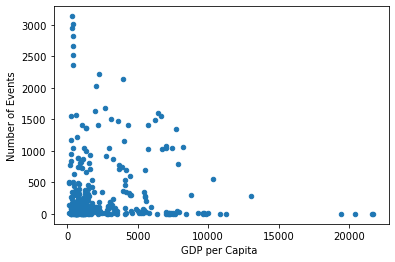

In [215]:
#------------------------------------
#3. Create a scatter plot of the (country-by-year) number of events versus GDP per capita. What does
#the relationship look like?

#destring gdp
acled_worldbank_merge['value'] = pd.to_numeric(acled_worldbank_merge['value'], errors='coerce')

gdp = acled_worldbank_merge[acled_worldbank_merge['Series Code'] == 'NY.GDP.PCAP.CD'] 
gdp.plot.scatter('value', 'countevents')
plt.xlabel('GDP per Capita ')
plt.ylabel('Number of Events')

#relationship doesn't look like anything too many data points for a scatter plot; 
#bad scaling of the axises with most points 'near' 0 compared to a few outliers in thousands of ACLED events.

In [216]:
#-----------------------------------------------
''' 4. Write a function that takes as inputs:
– a variable name from the World Bank Data
– the type of group involved (inter1) from the ACLED dataset
– titles to be used for the graph
Based on these inputs, the function should create a scatter plot that shows the number of events per
country and year that this type of group is involved in versus the selected variable from the World
Bank Data.
'''

#wbvar is the series code e.g. for GDP per cap its 'NY.GDP.PCAP.CD'
def acled_wb_plot(wbvar, inter1, xtitle, ytitle):
    #Start by getting acled counts for inter1 group
    acled = pd.read_csv('../../data/acled_to_2019-12-31_Africa.csv')
    
    #New condition on acled to inter1 before drop duplicates
    acled = acled[acled['inter1'] == inter1]
    
    #Remove duplicates for same event different actors
    acled_one_event = acled.drop_duplicates(subset=['data_id'])
    
    #groupby country, year and get counts.
    ctry_yr_cts = acled_one_event.groupby(['country', 'year'], as_index=False).count()
    ctry_yr_cts = ctry_yr_cts[['country', 'year', 'data_id']]
    ctry_yr_cts = ctry_yr_cts.rename(columns={'data_id':'countevents'})
    
    #-----------------
    #World bank
    worldbank = pd.read_csv('../../data/world_bank_data.csv')
    
    worldbank = worldbank.dropna(subset=['Series Code'])

    worldbank_reshape = worldbank.melt(id_vars=['Series Name', 'Series Code', 'Country Name', 'Country Code'])
    
    #set up merge key variables
    worldbank_reshape['year'] = worldbank_reshape['variable'].str[0:4].astype(int)
    worldbank_reshape['country'] = worldbank_reshape['Country Name']
    
    acled_worldbank_merge = worldbank_reshape.merge(ctry_yr_cts, how='inner', on=['country', 'year'])
    
    acled_worldbank_merge['value'] = pd.to_numeric(acled_worldbank_merge['value'], errors='coerce')
    
    plotdf = acled_worldbank_merge[acled_worldbank_merge['Series Code'] == wbvar] 
    #---------------------------------
    #Make scatterplot
    plotdf.plot.scatter('value', 'countevents')
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    
    plt.locator_params(axis='x', nbins=5)



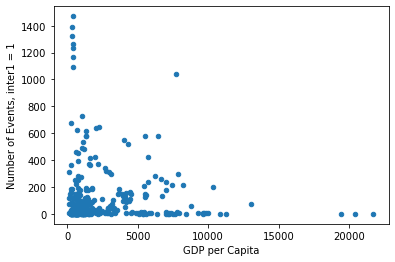

In [217]:
acled_wb_plot('NY.GDP.PCAP.CD', 1, 'GDP per Capita', 'Number of Events, inter1 = 1')

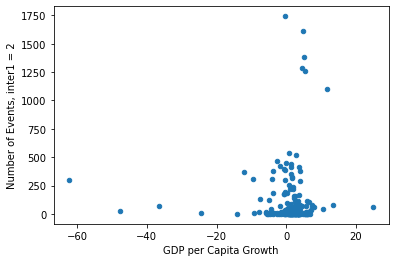

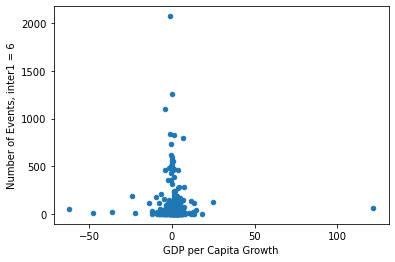

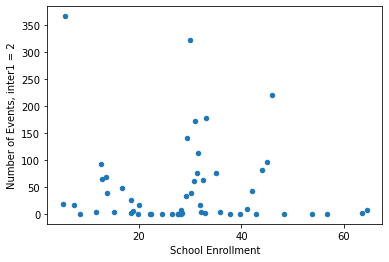

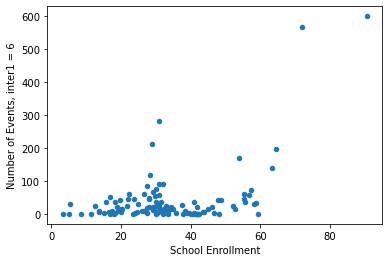

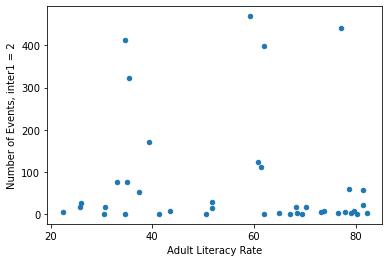

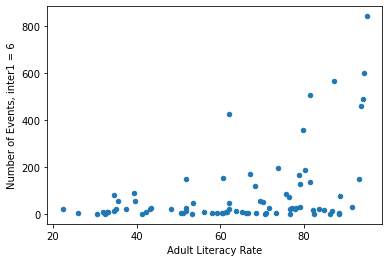

In [218]:
#-----------------------------------
'''5. Use your function to create 6 scatter plots, which will show: the number of events involving
inter1==2 or inter1==6 (separately), versus GDP per capita growth, school enrollment, and adult
literacy rate (separately). '''

acled_wb_plot('NY.GDP.PCAP.KD.ZG', 2, 'GDP per Capita Growth', 'Number of Events, inter1 = 2')
acled_wb_plot('NY.GDP.PCAP.KD.ZG', 6, 'GDP per Capita Growth', 'Number of Events, inter1 = 6')

acled_wb_plot('SE.SEC.NENR', 2, 'School Enrollment', 'Number of Events, inter1 = 2')
acled_wb_plot('SE.SEC.NENR', 6, 'School Enrollment', 'Number of Events, inter1 = 6')

acled_wb_plot('SE.ADT.LITR.ZS', 2, 'Adult Literacy Rate', 'Number of Events, inter1 = 2')
acled_wb_plot('SE.ADT.LITR.ZS', 6, 'Adult Literacy Rate', 'Number of Events, inter1 = 6')

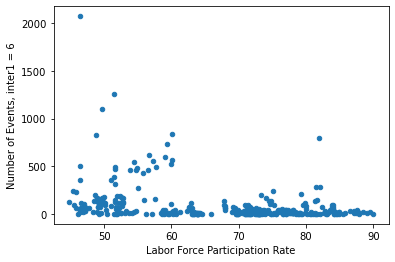

In [219]:
#---------------------------------------
#6. Create an additional graphic of your choice, based on a relationship that you find interesting in the
#data. Describe what the graph shows, and why you chose to look at these variables.

#Labor Force Participation Rate SL.TLF.ACTI.ZS
acled_wb_plot('SL.TLF.ACTI.ZS', 6, 'Labor Force Participation Rate', 'Number of Events, inter1 = 6')

#Possible theory: in countries with low labor force participation rate, people will have more time/reason to protest
#so there will be more protesting and protest-based violence

# in picture it looks like this could be true but not very strong evidence, but again the scatter plot is visually
# dominated by the outliers with a large number of ACLED events

In [220]:
#-----------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------

In [221]:
#Towards Regression
#1. Given y_i = a + Bx_i + u_i, write a function that returns the residual sum of squares given inputs a, b, x, y

#a is a constant, B is a constant, x is a n x 1 vector, y is a n x 1 vector
def sumofsquares(a, b, x, y):
    yhat = a + b*x
    residuals = y - yhat
    residual_sq = np.square(residuals)
    residualsum = residual_sq.sum()
    
    return residualsum

In [222]:
x = np.array([1, 1])
y = np.array([1, 2])
a = 2
b = 3

sumofsquares(a, b, x, y)

25

In [223]:
#---------------------
#2. Create x as an array of 100 random elements. Let yi = 5 ∗ xi + 3. Apply your function to
#x, y, α = 3, β = 5. What does it return?

randomx = np.random.rand(1, 100)
y = randomx*5 + 3
randomx, y

sumofsquares(3, 5, randomx, y)

#returns 0

0.0

In [224]:
#---------------------
#3 where ϵi is normally distributed with mean 0 and variance 1 (Hint: you can use np.random.normal).
#Apply your function to x, z, α = 3, β = 5. What does it return?

z = randomx*5 + 3 + np.random.normal()
randomx, z

sumofsquares(3, 5, randomx, z)

66.67064562845957

In [225]:
#Critical values df = 100: upper 124.342, lower 77.929
# from https://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm

testsum = sumofsquares(3, 5, randomx, z)
assert (testsum >= 77.929 and testsum <= 124.342)

AssertionError: 

In [226]:
#------------------------------------------------------------------
#5. given x, y from above use matrix algebra to solve for alpha, beta

#now B = (X'X)^-1(X'Y) or B = sum(x*y) / sum(x^2) for scalar
# python storing vectors transposed e.g. y is 1 x 100
newx = np.transpose(randomx)
newy = np.transpose(y)

#rewrite the model as y = Bx by adding columns of 1s
#so constant is subsumed in B
matx = np.hstack((newx, np.ones([newx.shape[0],1], newx.dtype)))

xy = np.matmul(np.transpose(matx), newy)
xx = np.matmul(np.transpose(matx), matx)
xxinvert = np.linalg.inv(xx)
beta = np.matmul(xxinvert, xy)
beta # returns a = 3, B = 5 as expected. 

array([[5.],
       [3.]])